In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **PHASE 2. EXPLORATORY DATA ANALYSIS**

In [2]:
# Task 2.1: Conduct exploratory data analysis to understand the distribution of features and the target variable .

df = pd.read_csv("easy_visa_data.csv")

In [3]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


### **Univariate Analysis**

##### **Numerical features**

In [4]:
# Checking the number of numerical features present
num_col =df.select_dtypes(['float64', 'int64']).columns
print(num_col)

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')


In [5]:
# Checking all the features (categorical and numerical variables)
cat_col = df.select_dtypes('object').columns

# Printing the number of counts of each column
for col in cat_col:
    print(df[col].value_counts())
    print("-" *50)

case_id
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
EZYV05       1
            ..
EZYV25476    1
EZYV25477    1
EZYV25478    1
EZYV25479    1
EZYV25480    1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

In [6]:
def histogram_boxplot(df, feature, figsize=(15,10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

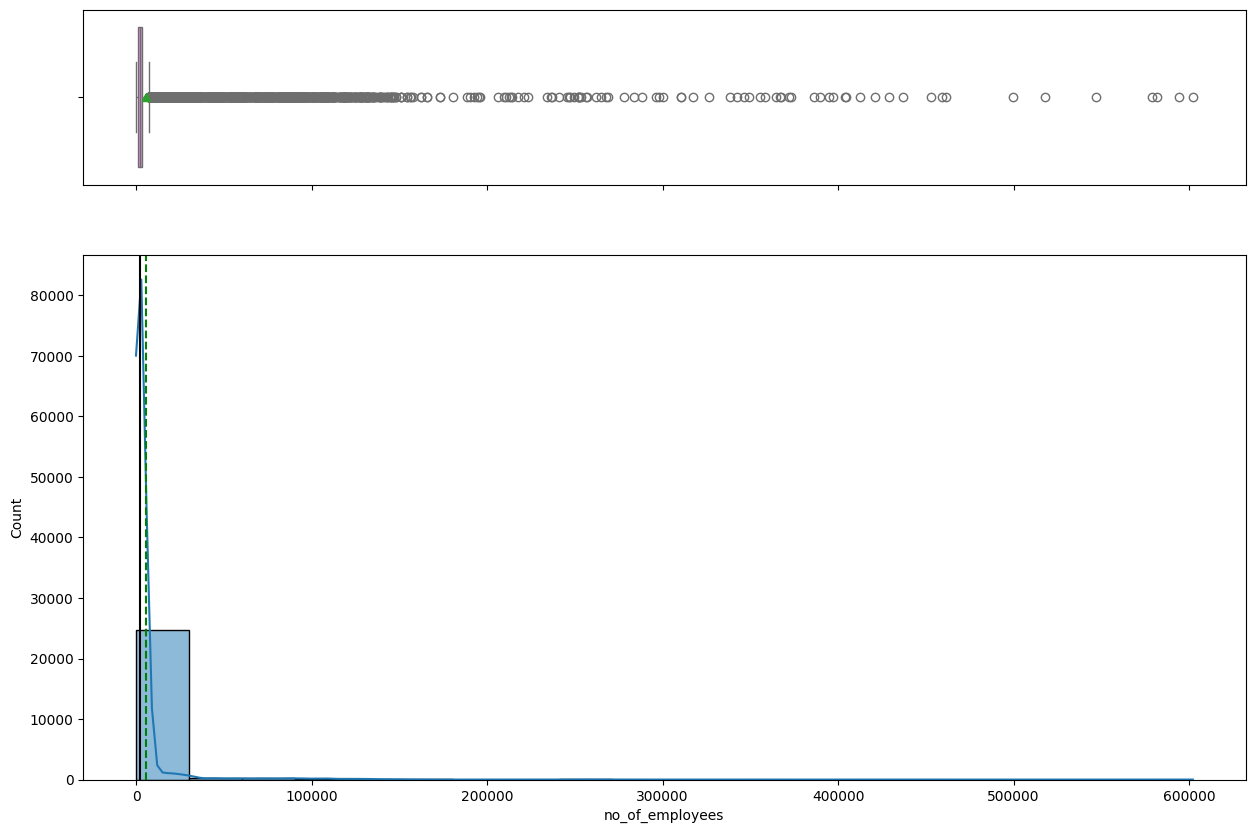

In [7]:
histogram_boxplot(df, 'no_of_employees', kde=True, bins=20)

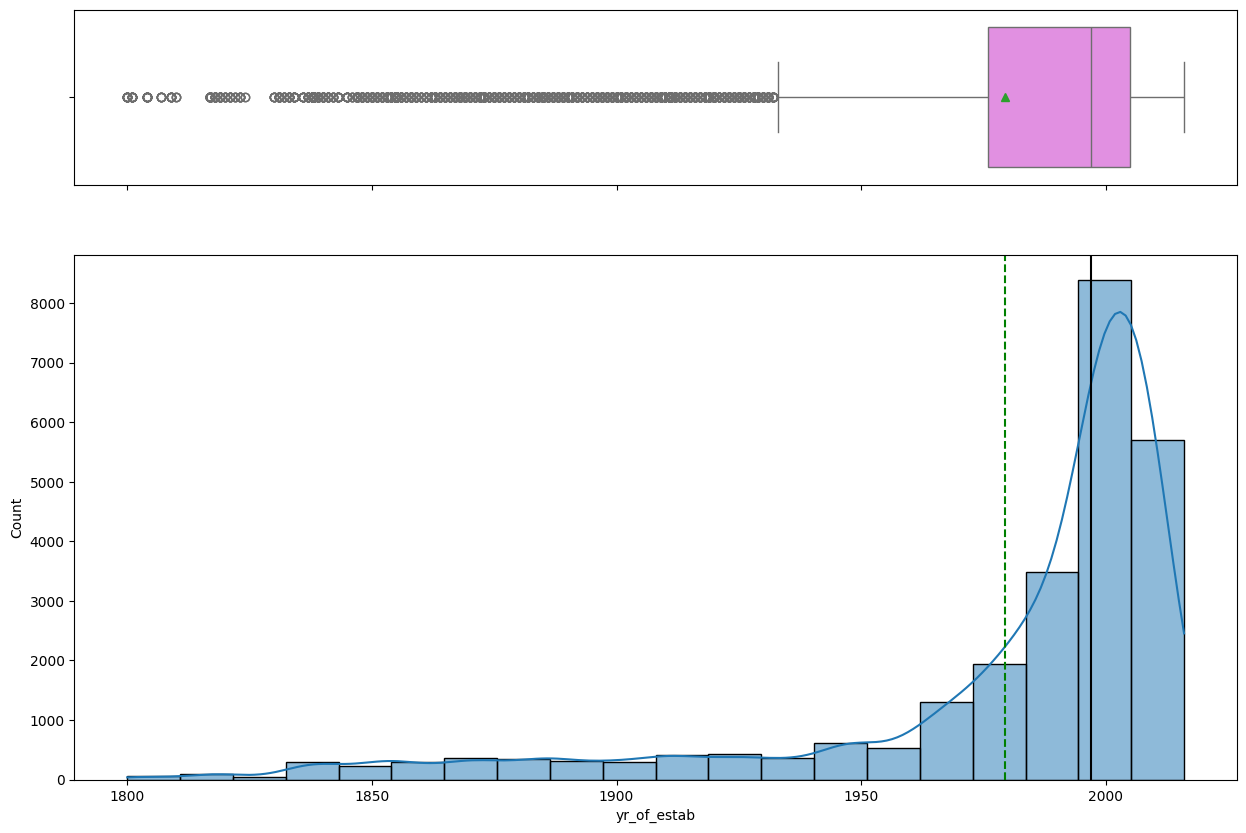

In [8]:
histogram_boxplot(df, 'yr_of_estab', kde=True, bins=20)

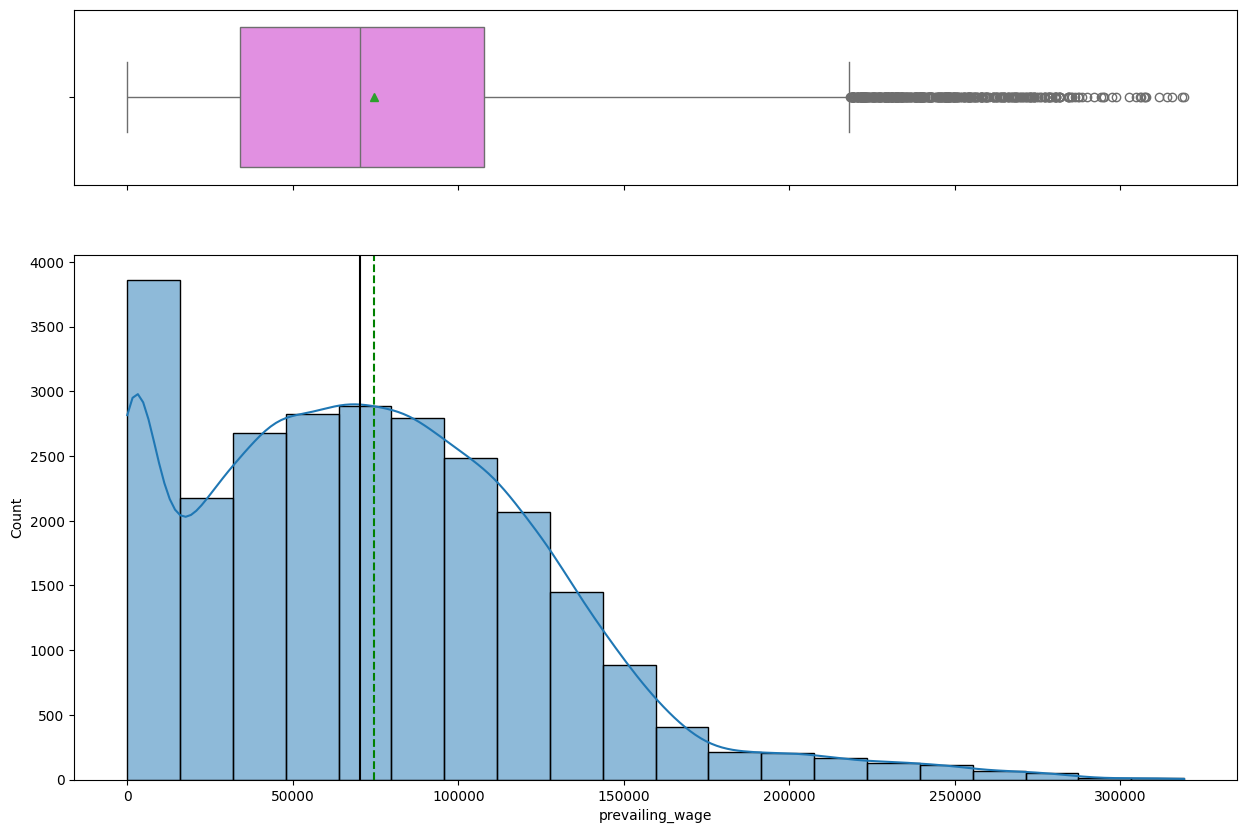

In [9]:
histogram_boxplot(df, 'prevailing_wage', kde=True, bins=20)

## Insights from Histogram and Boxplot Visualizations:

1. Number of Employees:

* Distribution: The number of employees is right_skewed, meaning there are companies with very large number of employees as against some with low employees.

* Outliers: The skewness indicates there is presence of outliers in the data.

* Action: Apply log transformation to normalize the skewness, if it doesn't work, try using RobustScaler or SMOTE to balance out the class.


2. Year establishment:

* Distribution: We can see that it left_skewed(positively_skewed), meaning that there is an increase in the year of establishment from the year 1970 to early 2000s.

* Outliers: This indicates that some of the companies were established earlier than 1970.

* Action: Cap the outliers to be within a range. We don't need to remove them beacause these companies are still functional.

3. Prevailing Wage:

* Distribution: We have a large number of employees earning below 20,000. Majority of the people earn between 30,000 to 150,000 while a few number of people earn above 150,000.

* Outliers: Presence of outlies in the dataset indicates that some people earn above 200,000.

* Action: Use log transformation to make the data more balanced. Also use robust scaler to make sure the outliers are within a particular range.


#### **Categorical features**

In [10]:
categorical_columns = df.select_dtypes(include='object').columns

In [11]:
def univariate_categorical_analysis(df, col):
    # Frequency and percentage
    distribution = df[col].value_counts()
    percentage = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({'Counts': distribution, 'Percentage (%)': percentage.round(2)})
    
    print(f"--- {col} Distribution ---\n")
    print(summary)
    print("\n")

    # Set up the figure
    plt.figure(figsize=(12, 5))

    # Bar chart
    plt.subplot(1, 2, 1)
    sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)
    plt.title(f"Distribution (Bar Chart) of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)

    # Pie chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot.pie(
        autopct="%1.1f%%",
        startangle=90,
        colors=sns.color_palette("Set2", len(distribution))
    )
    plt.title(f"Distribution (Pie Chart) of {col}", fontsize=13)
    plt.ylabel("")  # Remove y-label for better layout

    plt.tight_layout()
    plt.show()



In [ ]:
for cols in categorical_columns:
    univariate_categorical_analysis(df, cols)

--- case_id Distribution ---

           Counts  Percentage (%)
case_id                          
EZYV01          1             0.0
EZYV02          1             0.0
EZYV03          1             0.0
EZYV04          1             0.0
EZYV05          1             0.0
...           ...             ...
EZYV25476       1             0.0
EZYV25477       1             0.0
EZYV25478       1             0.0
EZYV25479       1             0.0
EZYV25480       1             0.0

[25480 rows x 2 columns]




C:\Users\Dell\AppData\Local\Temp\ipykernel_14640\816618447.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="Set2", order=distribution.index)
